In [3]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad
from autograd import numpy as np
from autograd import value_and_grad
from autograd import hessian
# import the dataset
csvname = 'datasets/student_debt_data.csv'
data = np.loadtxt(csvname,delimiter=',')

# cut into input/output data
x = data[0:1,:]
y = data[1:,:]

<IPython.core.display.Javascript object>


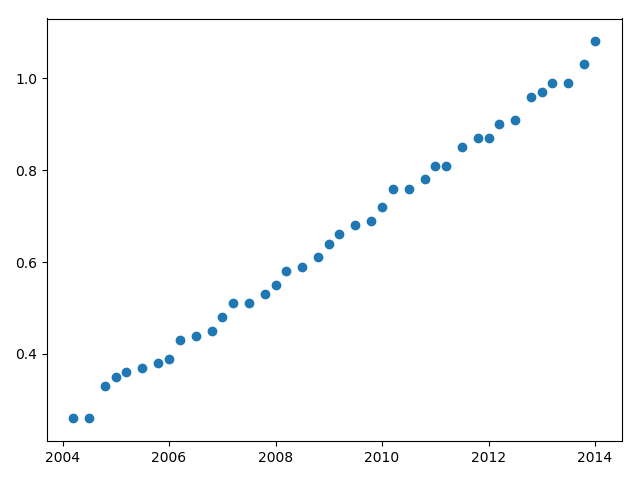

In [4]:
import matplotlib.pyplot as plt
figure = plt.figure()
plt.scatter(x,y)
plt.show()

In [ ]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad
from autograd import numpy as np
from autograd import value_and_grad
from autograd import hessian

def newtons_method(g, max_its, w, **kwargs):
    gradient = grad(g)
    #eigenvals of a square matrix -- C in our example
    hess = hessian(g)
    
    epsilon = 10**(-7)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']
        
    weight_history = [w]
    cost_history = [g(w)]
    
    for k in range(max_its):
        grad_eval = gradient(w)
        hess_eval = hess(w)
        
        print("hess_eval: ", hess_eval)
        print("np.size-hess_eval = 1 raised to the .5: ", np.size(hess_eval)**(.5))
        hess_eval.shape = (int((np.size(hess_eval))**(.5)), int((np.size(hess_eval))**(.5)))
        print("new hess eval: ", hess_eval)
        #i would like to understand this reshape betteer
        #we're assuming it's positive aka convex
        
        print("A will be: ", hess_eval + epsilon*np.eye(w.size))
        #look at 4.8
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        
        #I don't follow how the below gets us to our next point
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

# def g(w,iter):
#     P = len(coeffs)
#     cost = 0
#     for i in iter:
#         # get quadratic
#         coeff = coeffs[i]
#         a = coeff[0]
#         b = coeff[1]
#         c = coeff[2]

#         # add to term
#         cost += (aw - y)^2
#         cost += (a + b*w + c*w**2)
#     return cost/P

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
def least_squares(w):
        cost = np.sum((model(x,w) -y)**2)
        return cost/float(np.size(y))
# def g2(x,y):
#     (y-x)^2

In [ ]:
# g = lambda w: np.log(1 + np.exp(w.T*w))

init_point = np.array([1.0])
num_its = 1

a1_wh, a1_ch = newtons_method(least_squares, num_its, init_point)
# a1_wh, a1_ch = gradient_descent(g, alpha_1, iterations, init_point)
# a2_wh, a2_ch = norm_gradient_descent(g, alpha_1, iterations, init_point, 'full')
# a3_wh, a3_ch = norm_gradient_descent(g, alpha_1, iterations, init_point, 'component')

fig1 = plt.figure()
plt.plot(a1_ch, 'k-', label = 'newtons method')
# plt.plot(a2_ch, 'm-', label = 'Fully Normalized grad descent')
# plt.plot(a3_ch, 'b-', label = 'Component Normalized grad descent')
plt.title("Cost Function History Plot")
plt.legend(loc="upper right")
plt.xlabel("step k")
plt.ylabel("g(w^k)")
plt.show();
print(a1_wh)
print(a1_ch)